<center> <h2> LABORATORIO 2 </h2> </center>

### PARTE 1: NUMPY

1) Cual es tamaño de bytes de un array de 1000 elementos de tipo booleano?

In [2]:
import numpy as np

arr = np.random.choice([True, False], size=1000)
print("Tamaño del array en bytes:", arr.size * arr.itemsize)

Tamaño del array en bytes: 1000


2) Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [3]:
arr = np.arange(2, 101, 2)[::-1]
print(arr[-10:])

[20 18 16 14 12 10  8  6  4  2]


3) Dado el array

2 4 5 6
0 3 7 4
8 8 5 2
1 5 6 1

Seleccione con una instrucción el subarray de elementos

0 3 7 4

Después, seleccione el subarray de elementos

2 5
8 5


In [37]:
array = np.array([[2, 4, 5, 6],
                  [0, 3, 7, 4],
                  [8, 8, 5, 2],
                  [1, 5, 6, 1]])
array


array([[2, 4, 5, 6],
       [0, 3, 7, 4],
       [8, 8, 5, 2],
       [1, 5, 6, 1]])

In [39]:
Seleccion1 = array[1, :]
print(Seleccion1)

[0 3 7 4]


In [58]:
Seleccion2 = array[[[0,0],[2,2]],[[0,2],[1,2]]]
print(Seleccion2)

[[2 5]
 [8 5]]


4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [59]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

resta = a - b

media = np.mean(resta)

print(media)

-0.25


5) Tengo valores de cordenadas (x, y) en las columnas del array
1.33 4.5
30.0 10.7
70.2 0.5
Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [62]:
coordenadas = np.array([[1.33, 4.5],
                        [30.0, 10.7],
                        [70.2, 0.5]])

nueva_coordenada = np.array([37.1, -3.6])

coordenadastotal = np.vstack([coordenadas, nueva_coordenada])

print(coordenadastotal)



[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]


In [64]:
print(coordenadastotal.shape)

(4, 2)


Copie el array del ejercicio anterior. Traspóngalo (.Agregue ahora dos nuevos pares de coordenadas: 
(10.8,3.0) y (35.8, 12.0).

In [65]:
coordenadas_transpuestas = np.transpose(coordenadastotal)
print(coordenadas_transpuestas)


[[ 1.33 30.   70.2  37.1 ]
 [ 4.5  10.7   0.5  -3.6 ]]


In [69]:
nuevas_coordenadas = np.array([[10.8, 35.8],
                               [3.0, 12.0]])

print(nuevas_coordenadas)

[[10.8 35.8]
 [ 3.  12. ]]


In [70]:
coordenadas_transpuestastotal = np.hstack([coordenadas_transpuestas, nuevas_coordenadas])
print(coordenadas_transpuestastotal)


[[ 1.33 30.   70.2  37.1  10.8  35.8 ]
 [ 4.5  10.7   0.5  -3.6   3.   12.  ]]


### PARTE 2: EXPLORACIÓN Y MINERÍA DE DATOS

Con el dataset nucleospoblacion.csv adjunto al laboratorio, luego responda las siguientes preguntas usando pandas y matplotlib.

1) ¿Cuántos Municipios tienen más de 100000 habitantes?.

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df_nucleos = pd.read_csv('NucleosPoblacion.csv')
df_nucleos.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


In [96]:
df_agrupado = df_nucleos.groupby('Municipio')['Poblacion'].sum().reset_index()

municipios_mas_100k = df_agrupado[df_agrupado['Poblacion'] > 100000]['Municipio'].count()
print(municipios_mas_100k)


75


2) Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:
a. ¿Cuál es la segunda ciudad más poblada?
b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

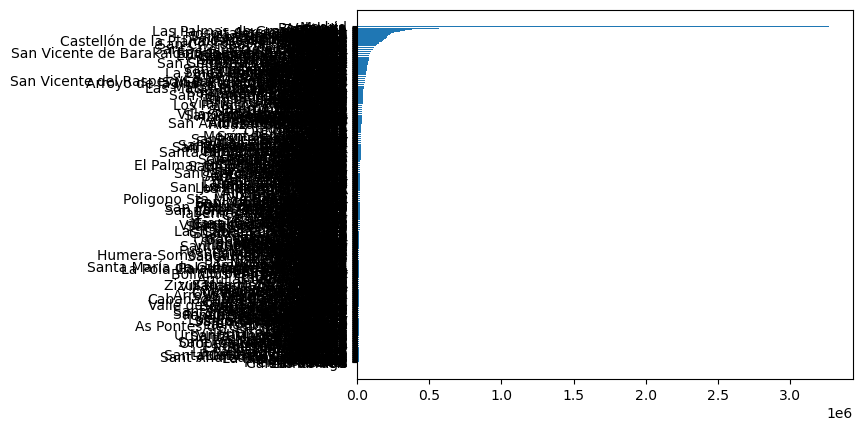

In [98]:
df_pregunta2 = df_nucleos.sort_values(by='Poblacion', ascending=True)
plt.barh(df_pregunta2['Texto'], df_pregunta2['Poblacion'])
plt.show()


In [100]:
segunda_ciudad = df_pregunta2['Texto'].iloc[-2]

print(segunda_ciudad)

Barcelona


In [119]:
df_pregunta2_1 = df_nucleos.sort_values(by='Poblacion', ascending=False).reset_index(drop=True)
###print(df_pregunta2_1)
posicion_granada = df_pregunta2_1.loc[df_pregunta2_1['Texto'] == 'Granada'].index[0] + 1
print(posicion_granada)

18


3) ¿Cuántos municipios de Malaga tienen más de 50000 habitantes?.

In [123]:
malaga = df_nucleos[df_nucleos['Provincia'] == 'Málaga']

municipios_50k = malaga[malaga['Poblacion'] > 50000]['Municipio'].count()

print(municipios_50k)

9


4) ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [127]:
Pregunta4 = df_nucleos.loc[df_nucleos['Y'].idxmax()]
print("Municipio más al norte:", Pregunta4['Municipio'])
print("Provincia:", Pregunta4['Provincia'])
print("Población:", Pregunta4['Poblacion'])

Municipio más al norte: Viveiro
Provincia: Lugo
Población: 16211.0


5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [131]:
Pregunta5 = df_nucleos[df_nucleos['Provincia'] == 'Granada']

media = Pregunta5['Poblacion'].mean()
mediana = Pregunta5['Poblacion'].median()
desviacion_estandar = Pregunta5['Poblacion'].std()
maximo = Pregunta5['Poblacion'].max()
minimo = Pregunta5['Poblacion'].min()

print("Media:", media)
print("Mediana:", mediana)
print("Desviación estándar:", desviacion_estandar)
print("Valor máximo:", maximo)
print("Valor mínimo:", minimo)

Media: 30217.85
Mediana: 17526.0
Desviación estándar: 50355.49171459277
Valor máximo: 239154.0
Valor mínimo: 10386.0


6) Realice un histograma con la población de los Municipios para cada una de las provincias.

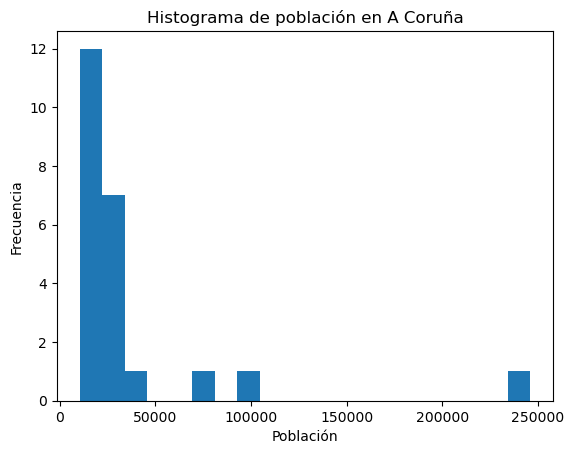

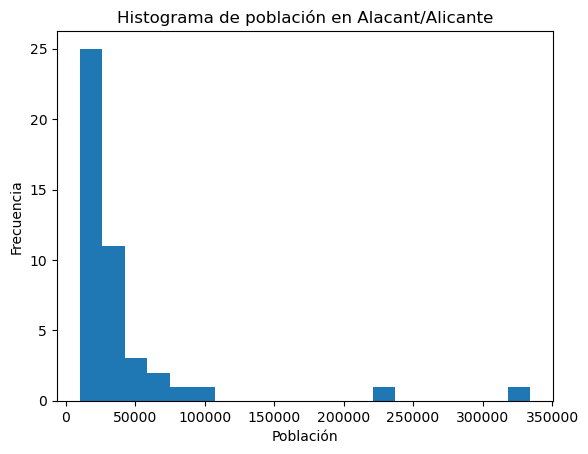

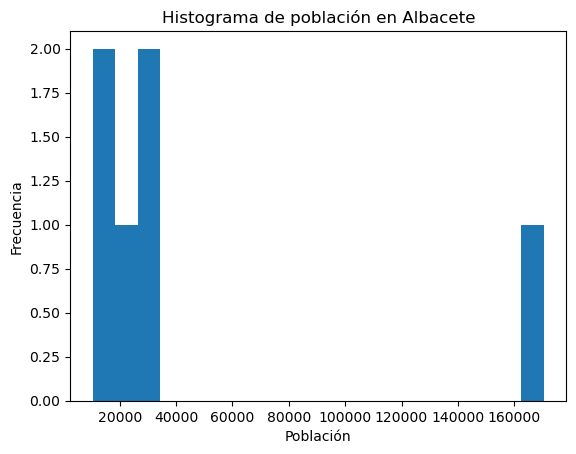

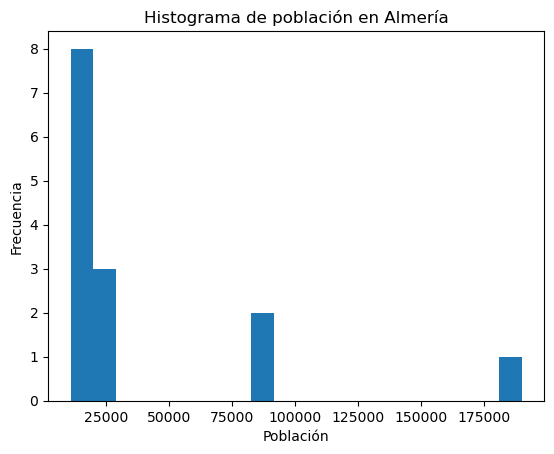

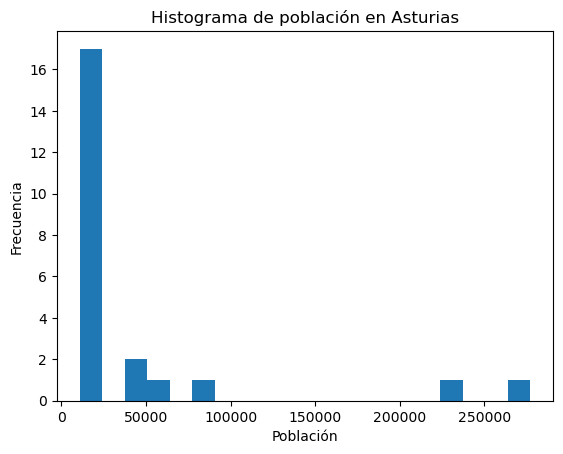

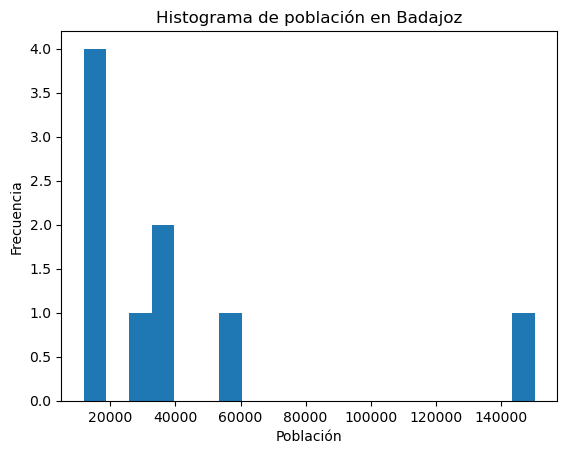

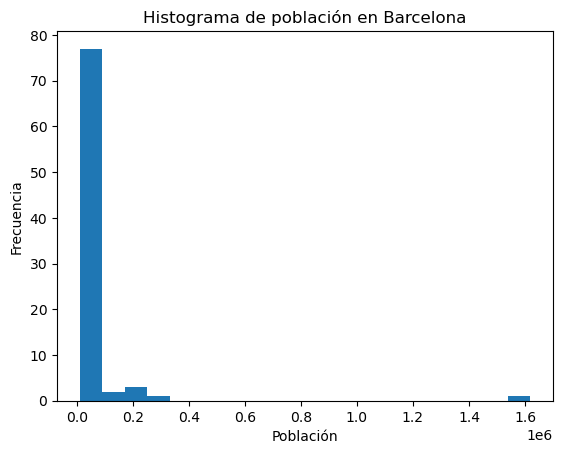

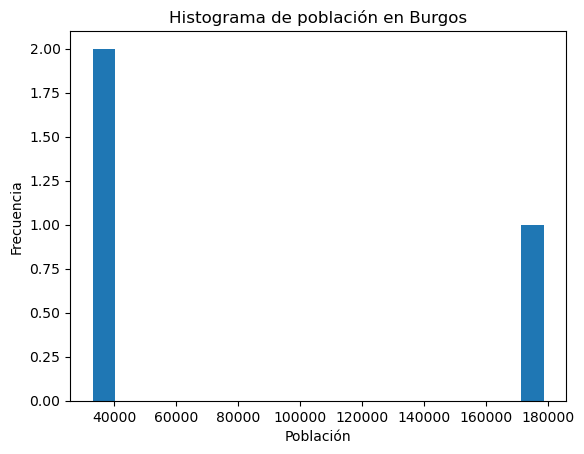

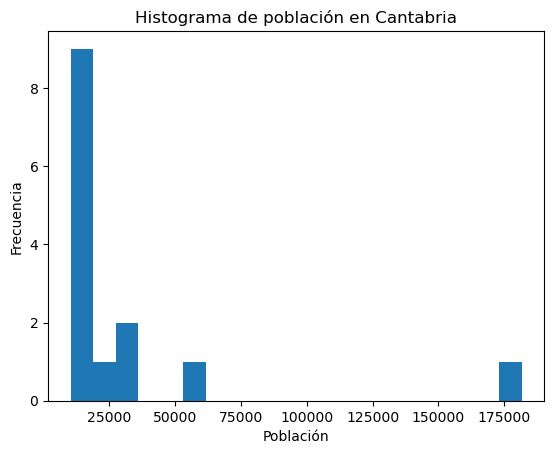

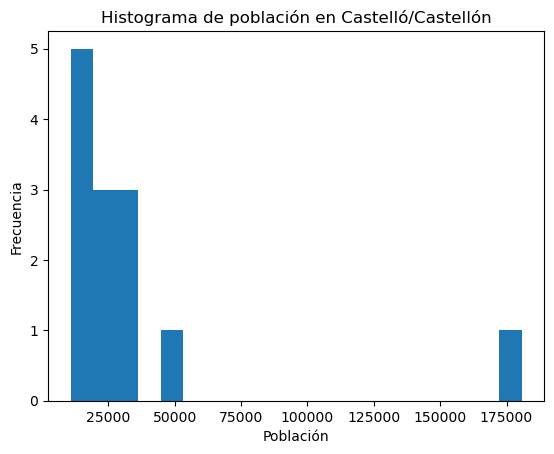

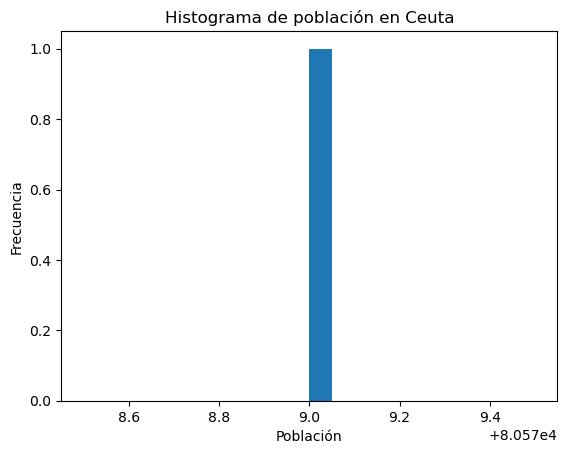

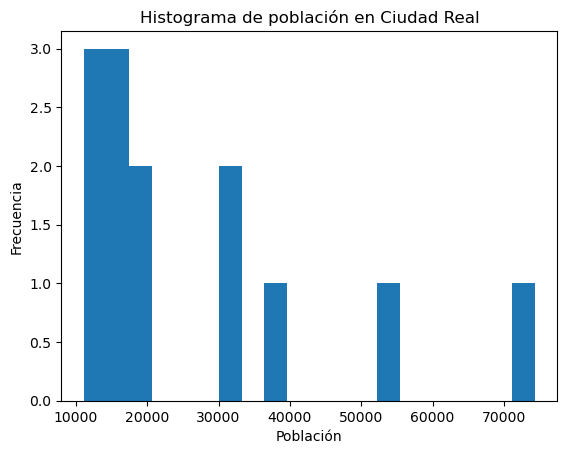

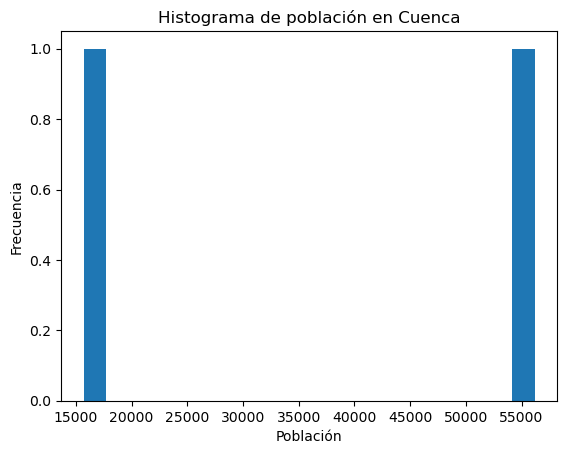

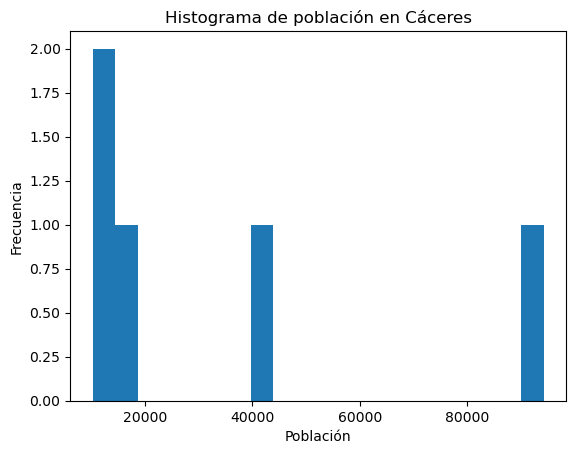

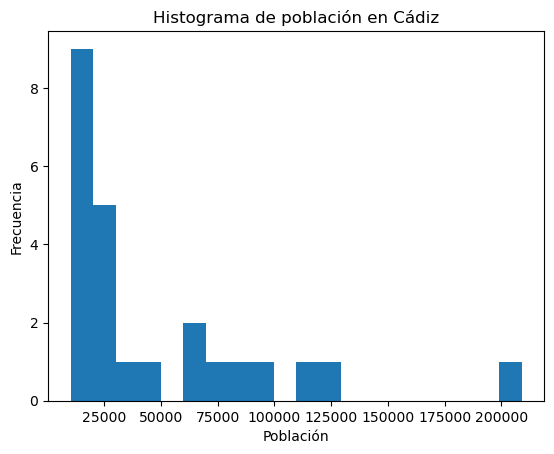

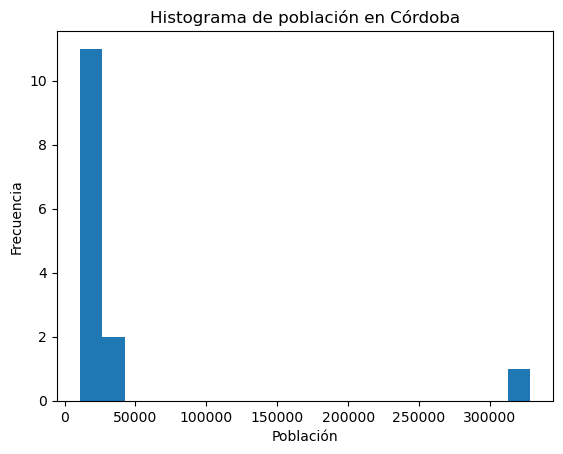

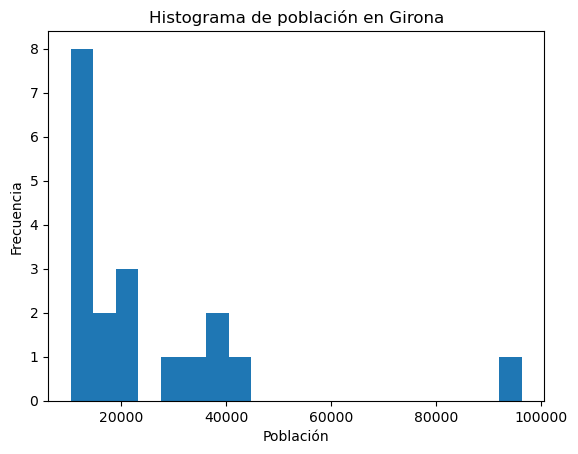

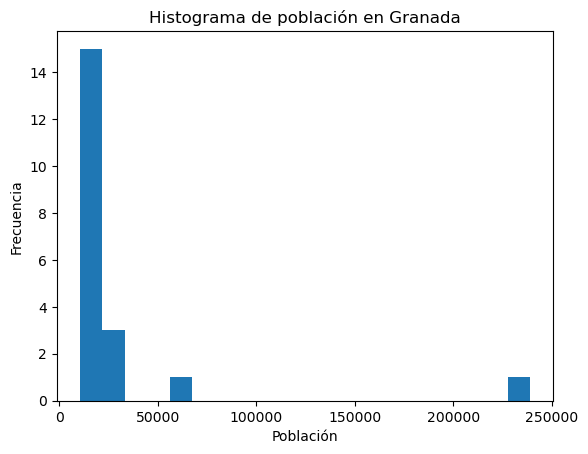

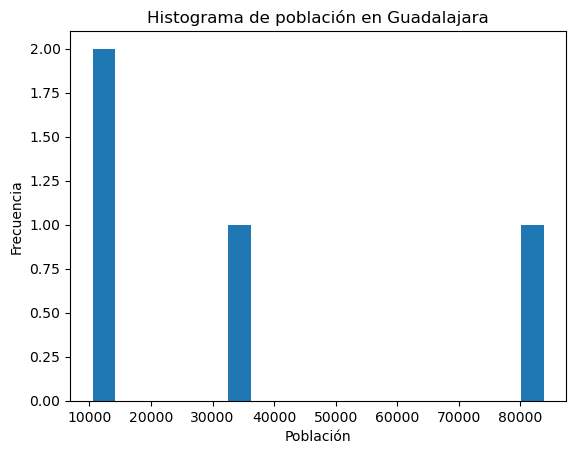

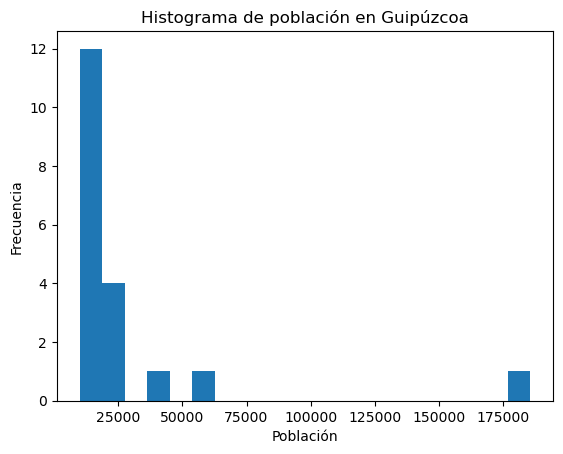

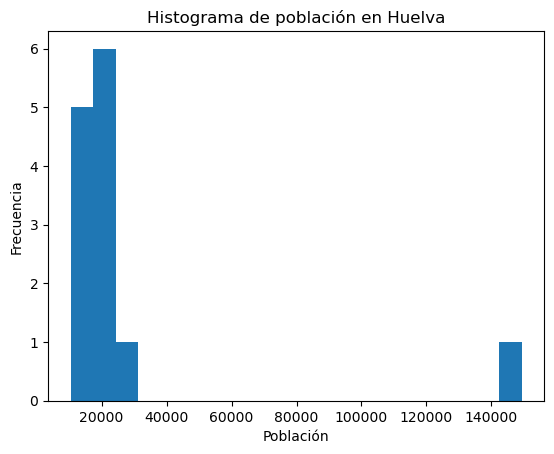

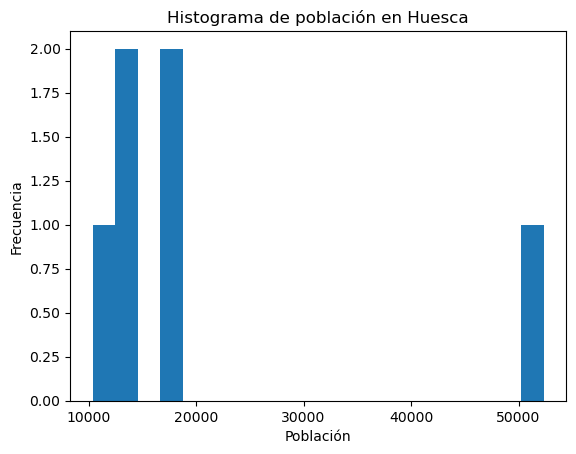

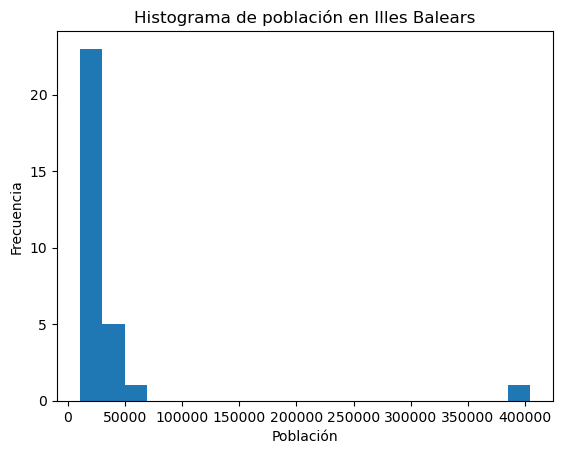

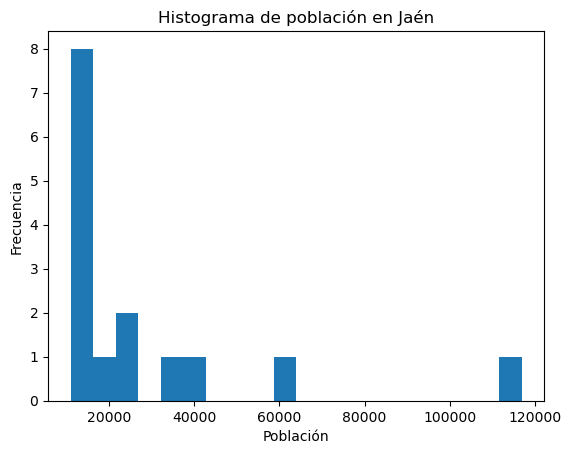

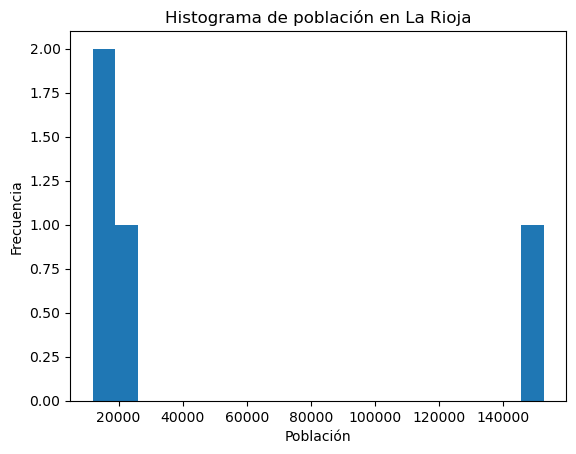

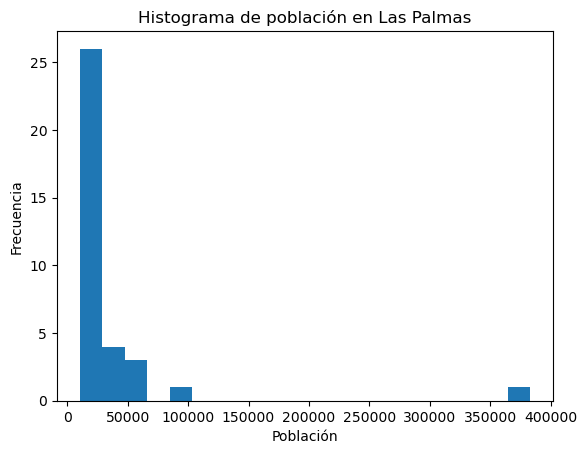

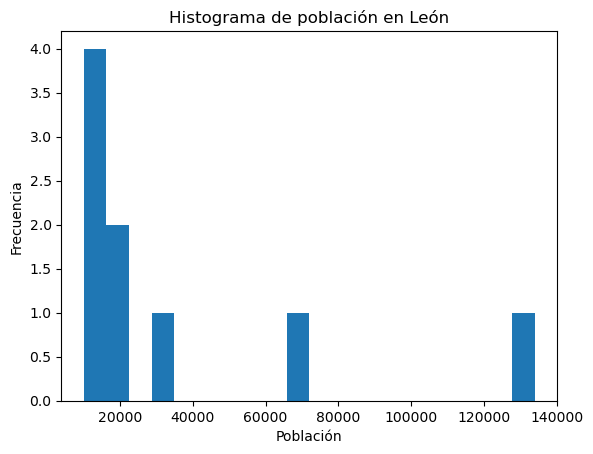

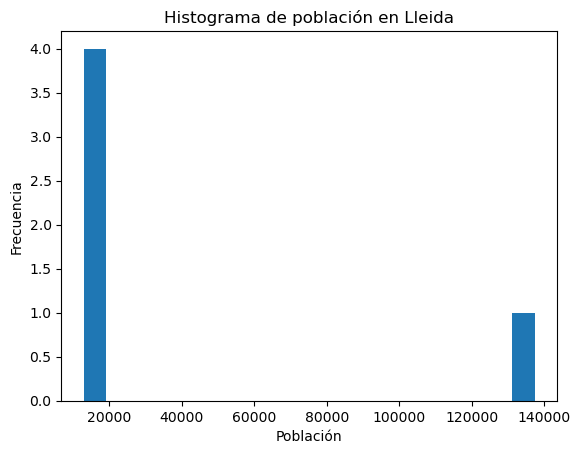

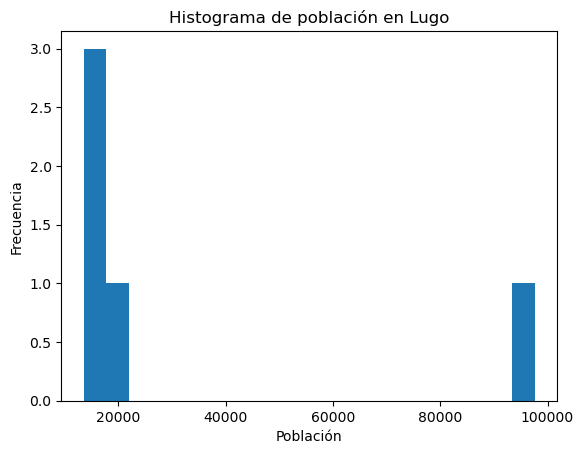

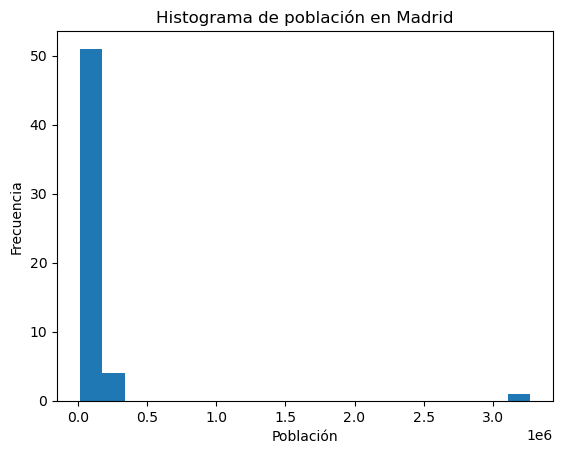

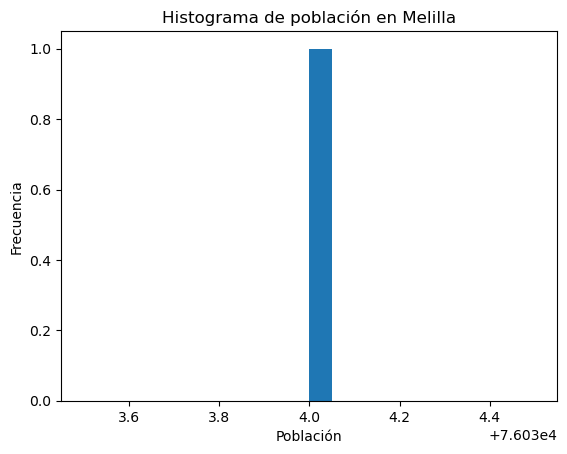

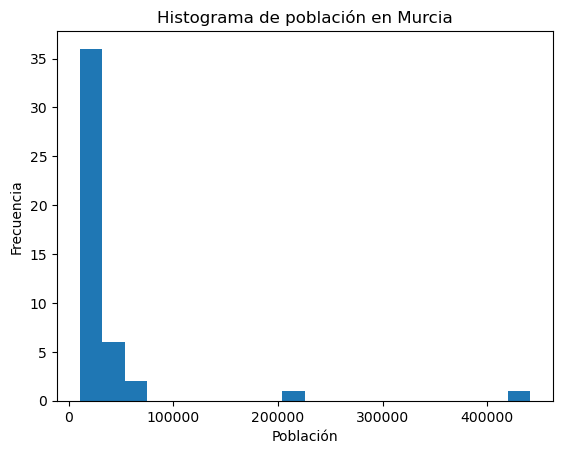

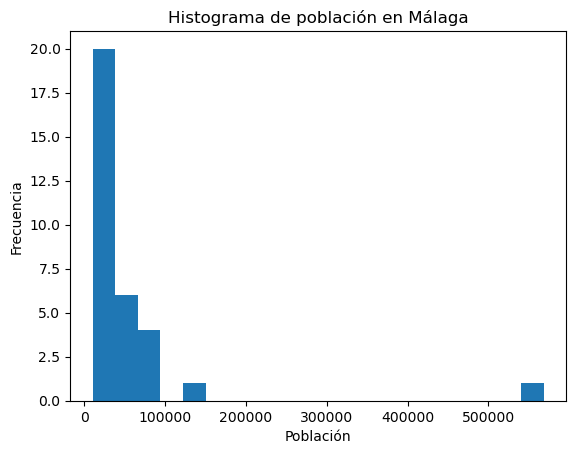

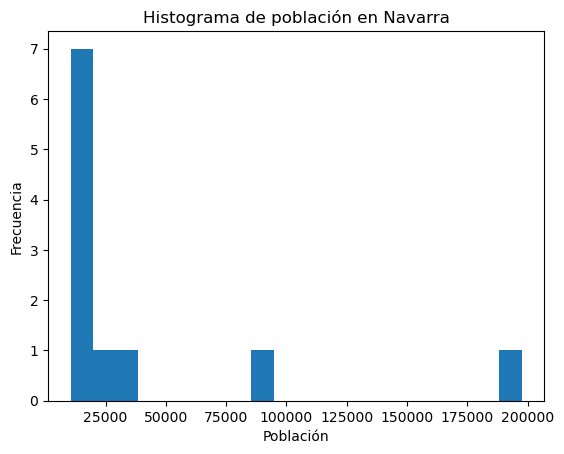

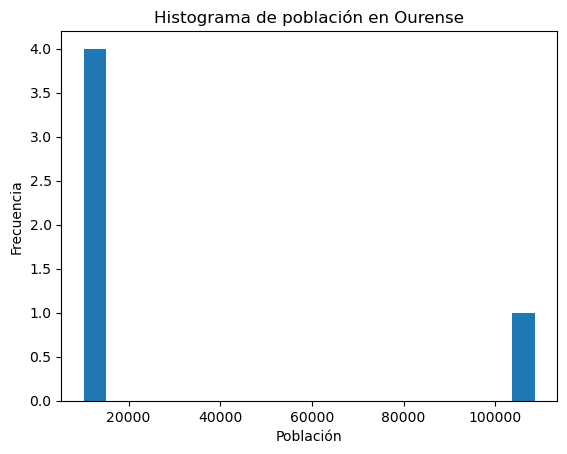

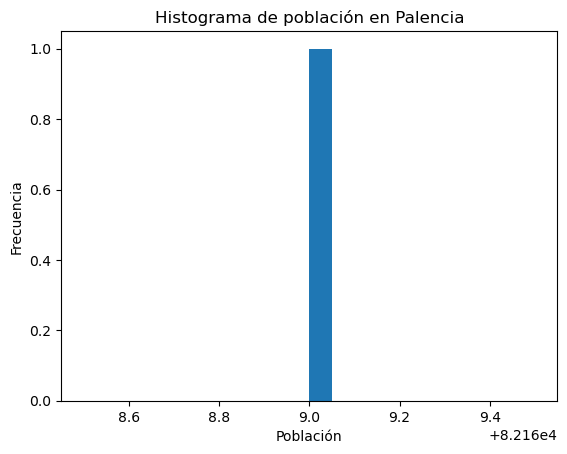

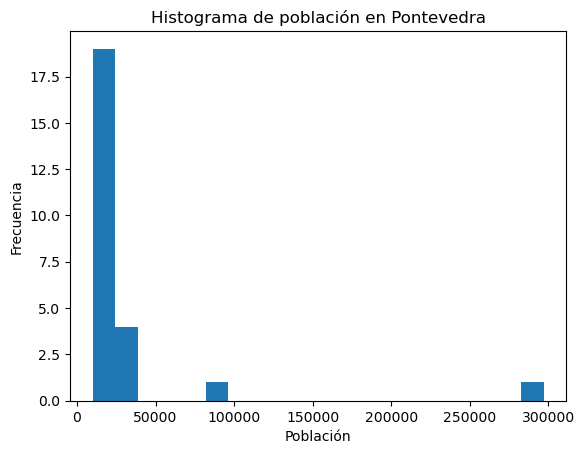

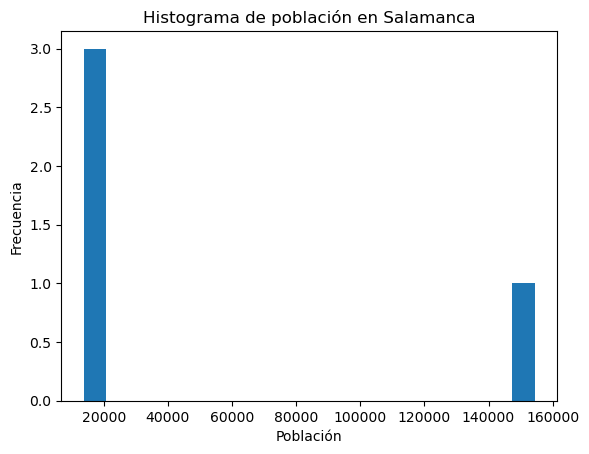

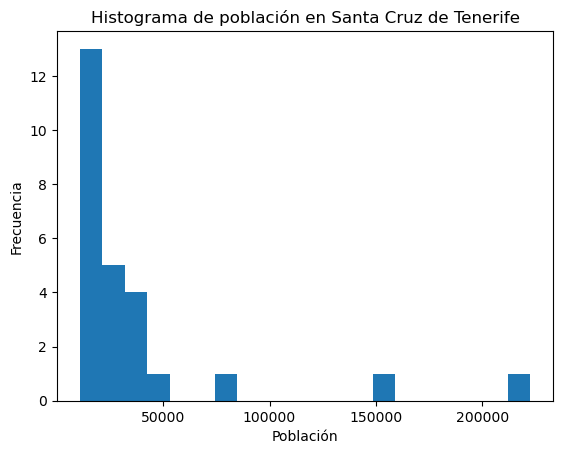

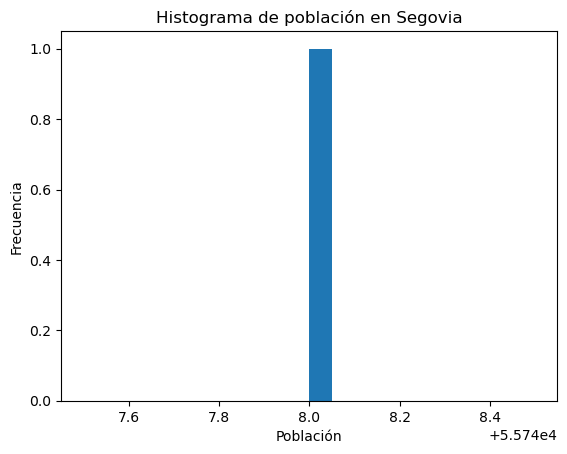

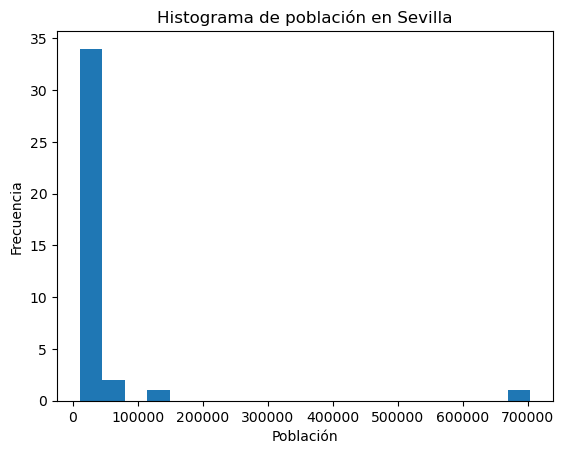

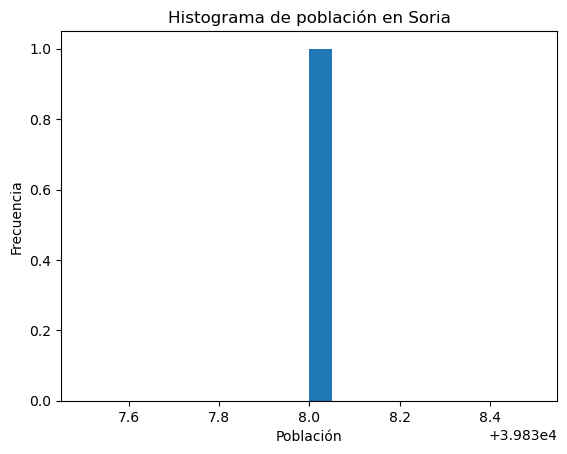

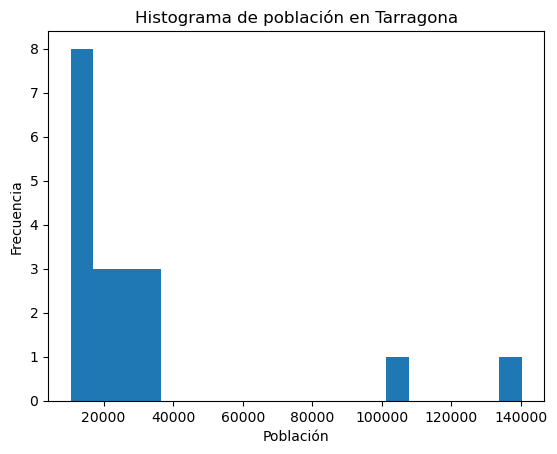

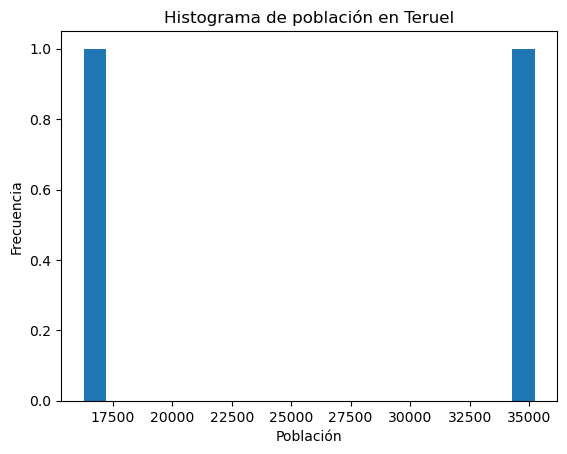

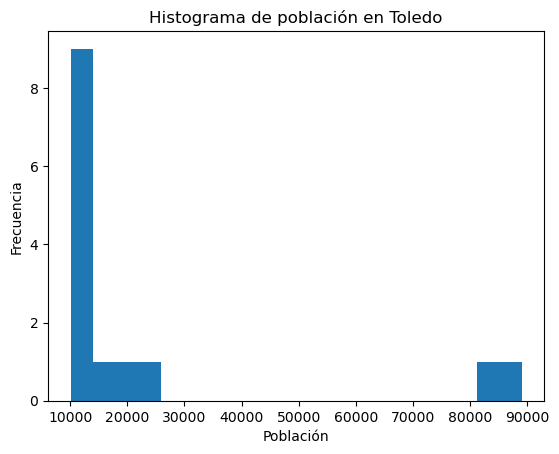

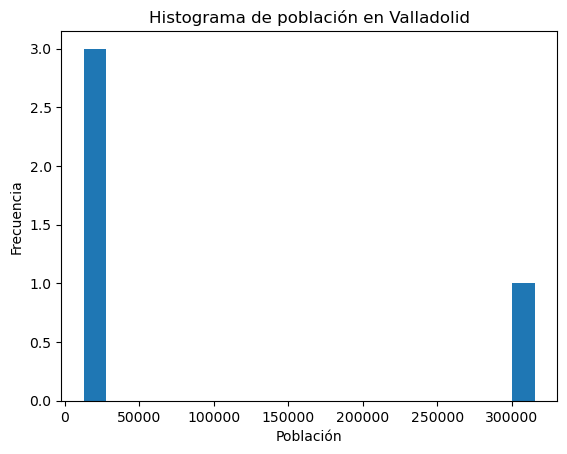

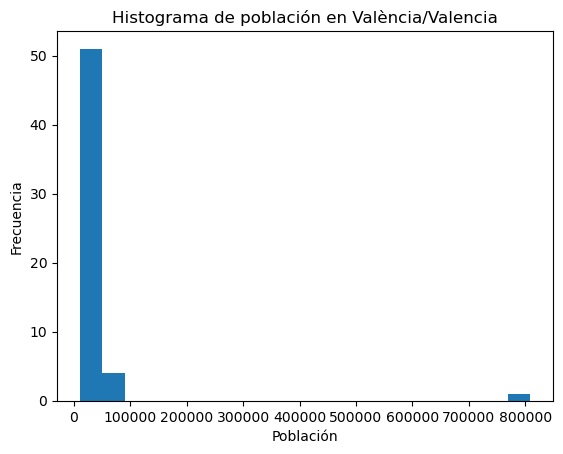

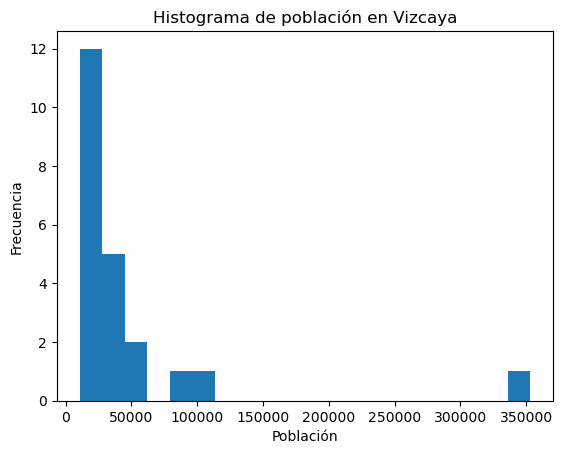

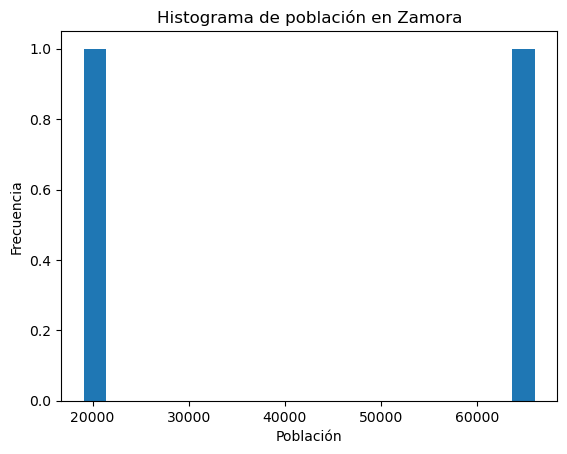

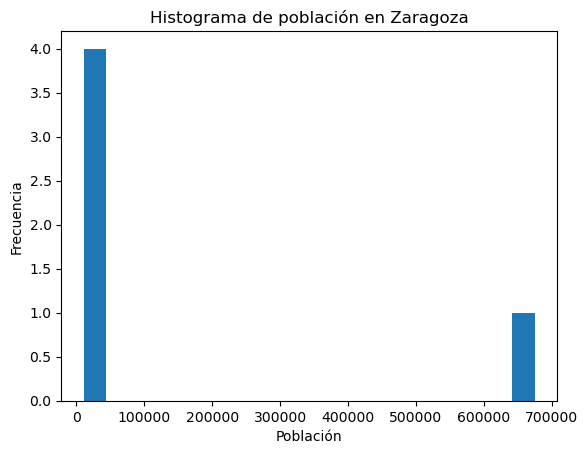

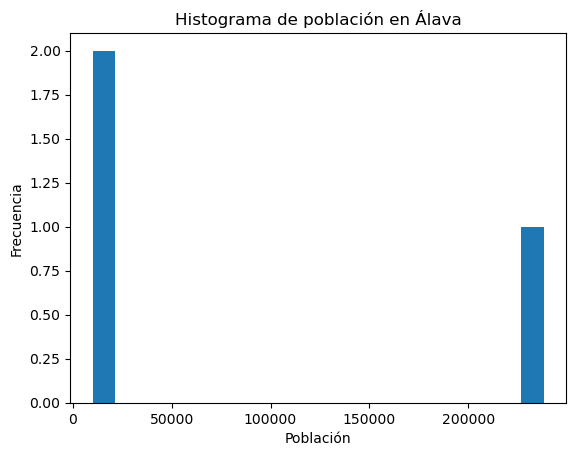

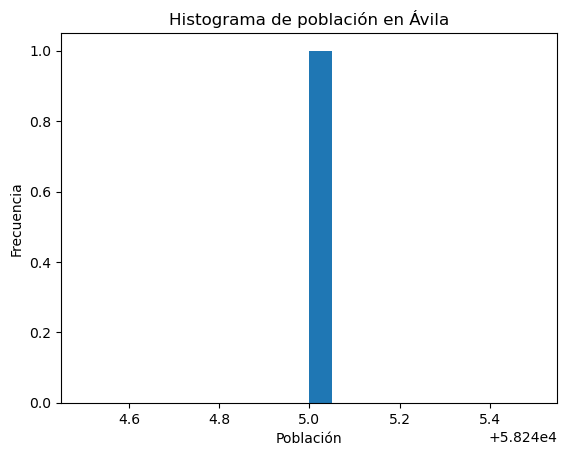

In [139]:
Agrupacion_provincia = df_nucleos.groupby('Provincia')

for provincia, df_provincia in Agrupacion_provincia:
    plt.hist(df_provincia['Poblacion'], bins=20)
    plt.title(f'Histograma de población en {provincia}')
    plt.xlabel('Población')
    plt.ylabel('Frecuencia')
    plt.show()

7) Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [153]:
Agrupacion_municipios = df_nucleos.groupby('Municipio').agg({'Poblacion': 'sum'}).reset_index()
municipios_aleatorios = Agrupacion_municipios.sample(n=50, replace=False, random_state=1)
promedio_poblacion = municipios_aleatorios['Poblacion'].mean()
desvest_poblacion = municipios_aleatorios['Poblacion'].std()
print('Promedio de poblacion:',promedio_poblacion)
print('Desviacion Estandar Poblacion:',desvest_poblacion)

Promedio de poblacion: 121402.66
Desviacion Estandar Poblacion: 470416.3029588298


8) Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [156]:
from math import sqrt

def distancia_madrid(row):
    x_madrid = df_nucleos[df_nucleos['Municipio'] == 'Madrid']['X'].values[0]
    y_madrid = df_nucleos[df_nucleos['Municipio'] == 'Madrid']['Y'].values[0]
    x_municipio = row['X']
    y_municipio = row['Y']
    distancia = sqrt((x_madrid - x_municipio)**2 + (y_madrid - y_municipio)**2)
    return distancia

In [159]:
df_nucleos['Distancia_Madrid'] = df_nucleos.apply(distancia_madrid, axis=1)
df_distancias = df_nucleos[df_nucleos['Municipio'] != 'Madrid']

In [160]:
municipio_cercano = df_distancias.loc[df_distancias['Distancia_Madrid'].idxmin()]['Municipio']
municipio_lejano = df_distancias.loc[df_distancias['Distancia_Madrid'].idxmax()]['Municipio']

print("Municipio más cercano a Madrid: ", municipio_cercano)
print("Municipio más lejano a Madrid: ", municipio_lejano)

Municipio más cercano a Madrid:  Pozuelo de Alarcón
Municipio más lejano a Madrid:  Los Llanos de Aridane
